In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Monthly/ALL_SIZE_MONTHLY_AVERAGE.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Monthly/ALL_SILH_SUIK_RT_MONTHLY_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

## **전체기간 총 상장 주식 수는 5014개**

In [3]:
stock_name_ls = raw_rt.iloc[1,1:].tolist()

In [4]:
len(stock_name_ls)

5014

## **보통주만 선별하는 작업 필요**

In [5]:
stock_name_ls[:10]

['조흥은행',
 '조흥은행(1신)',
 '조흥은행(2신)',
 '동화약품',
 '동화약품공업(1신)',
 '동화약품(전환1신)',
 '동화약품(전환2신)',
 '우리은행',
 '한빛은행(1신)',
 '한국상업은행(2신)']

## **Raw 데이터에 문제가 있는 15개 기업 제거**

In [6]:
error_stock_ls = ['삼성물산','알루코','하나은행','두산건설','SK',
                  '고려시멘트','광주은행','경남은행','신성이엔지',
                  '현대리바트','세원','풀무원','국민은행','핸디소프트','아이티센']

In [7]:
stock_name_ls = [x for x in stock_name_ls if not x in error_stock_ls]

In [8]:
def clean_uncommon_stocks(stock_name_ls):
    # (1신) 꼴 제거
    unwanted_word_ls = ['(', '1신', '2신', '3신','4신','우B','우C','1','2','3','우선','스팩']
    
    for unwanted_word in unwanted_word_ls:
        stock_name_ls = [x for x in stock_name_ls if not unwanted_word in x]
    
    stock_name_ls = [x for x in stock_name_ls if not x[-1] == '우']
    return stock_name_ls

## **최종적으로 선정된 주식의 수는 2900개**

In [9]:
common_stock_ls = clean_uncommon_stocks(stock_name_ls)
len(common_stock_ls)

2900

# 성과지표 데이터프레임 전처리 수행

In [12]:
per_df = Ko.Preprocessing(raw_per, column = '기업명', drop_limit=0)
per_df = per_df.loc[common_stock_ls]

In [13]:
len(per_df)

2900

# 수익률 DF 전처리

In [19]:
rt_df = Ko.Preprocessing(raw_rt, column = '기업명', drop_limit=0).apply(lambda x: Ko.rt_transform(x), axis = 1)

rt_df = rt_df.loc[common_stock_ls]
rt_df = rt_df.iloc[:, :-1]

In [20]:
rt_df.loc['조흥은행'].iloc[173:178]

20040630    0.8571
20040731    1.0000
20040831    0.0000
20040930       NaN
20041031       NaN
Name: 조흥은행, dtype: float64

In [21]:
len(rt_df)

2900

# 포트폴리오 구성 수행

In [22]:
data = Ko.portfolio_selection(per_df)

In [23]:
data.head(5)

,19900131,19900228,19900331,19900430,19900531,19900630,19900731,19900831,19900930,19901031,...,20171130,20171231,20180131,20180228,20180331,20180430,20180531,20180630,20180731,20180831
조흥은행,x,9,9,9,9,9,9,9,9,9,...,x,x,x,x,x,x,x,x,x,x
동화약품,x,5,5,5,5,5,4,4,5,5,...,7,7,7,7,7,7,7,7,7,7
우리은행,x,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
KR모터스,x,5,5,5,5,5,5,5,5,5,...,3,2,2,2,2,2,2,2,3,2
경방,x,6,6,6,6,6,6,6,6,6,...,8,7,7,7,7,7,7,7,7,7


# 포트폴리오 성과분석

In [24]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [25]:
result.min()

GROUP_0    0.682962
GROUP_1    0.672939
GROUP_2    0.691115
GROUP_3    0.682111
GROUP_4    0.663861
GROUP_5    0.680531
GROUP_6    0.665676
GROUP_7    0.671622
GROUP_8    0.671831
GROUP_9    0.712549
dtype: float64

In [26]:
result.max()

GROUP_0    2.270130
GROUP_1    1.799096
GROUP_2    1.468404
GROUP_3    1.447576
GROUP_4    1.473720
GROUP_5    1.468504
GROUP_6    1.491181
GROUP_7    1.590315
GROUP_8    1.466562
GROUP_9    1.516897
dtype: float64

# 1990년대

Text(0.5,1,'Performance result by PER Group')

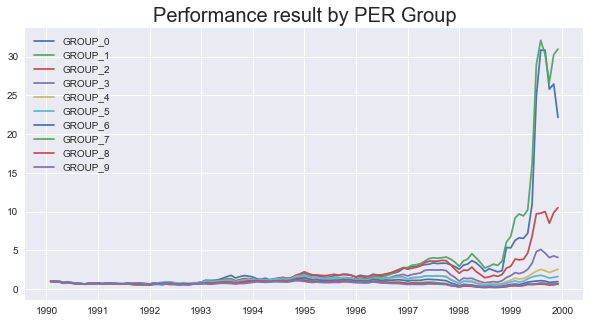

In [27]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[:119].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

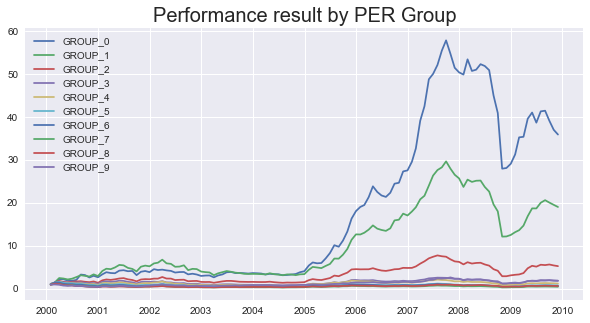

In [28]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[120:239].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

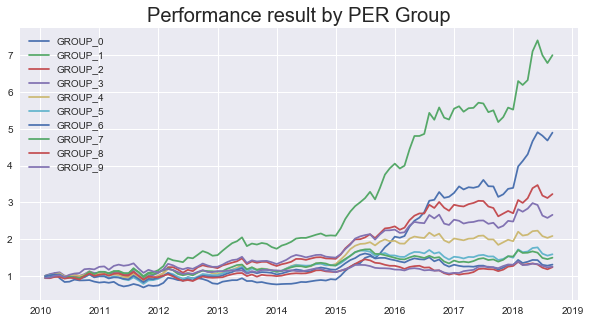

In [29]:
plt.figure(figsize = (10,5))

for column in result.columns:
    plt.plot(result[column].iloc[240:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

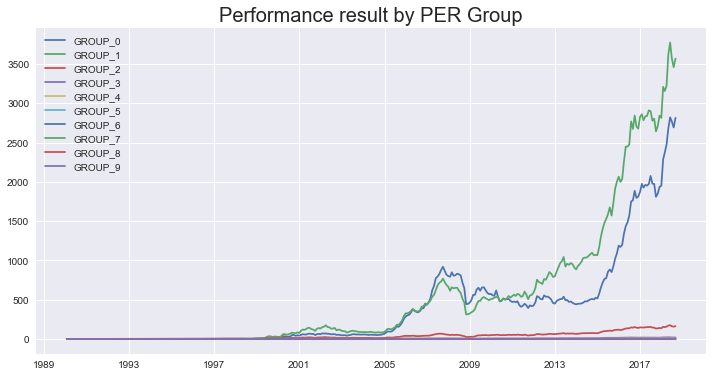

In [30]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

In [31]:
summary_df = result.describe().apply(lambda x: round(x,3))
summary_df.loc['count'] = result.prod().apply(lambda x: np.power(x,1/len(result)))
summary_df.rename({'count' : 'geo_mean_return',
                    'mean' : 'arith_mean_return'},
                  inplace = True)
summary_df.apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
geo_mean_return,1.023,1.024,1.015,1.009,1.006,1.002,0.999,0.998,0.998,1.001
arith_mean_return,1.031,1.030,1.020,1.013,1.010,1.006,1.004,1.002,1.002,1.005
std,0.143,0.117,0.101,0.097,0.095,0.095,0.096,0.094,0.090,0.086
min,0.683,0.673,0.691,0.682,0.664,0.681,0.666,0.672,0.672,0.713
25%,0.965,0.970,0.967,0.960,0.956,0.961,0.954,0.955,0.954,0.959
50%,1.013,1.021,1.012,1.005,1.005,1.005,0.999,1.000,1.000,0.998
75%,1.073,1.076,1.064,1.058,1.056,1.050,1.049,1.049,1.046,1.048
max,2.270,1.799,1.468,1.448,1.474,1.469,1.491,1.590,1.467,1.517
